# Logistic regression

This exercise is described in [ex2.pdf](data/ml-ex2/ex2.pdf).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

%matplotlib inline

## Unregularized logistic regression

In [2]:
# Admission data: 
# - exam 1 score (x1) 
# - exam 2 score (x2)
# - admitted (y)
data = np.loadtxt('data/ml-ex2/ex2data1.txt', delimiter=',')

In [3]:
# Separate features (x1, x2) from target (y)
X, y = np.hsplit(data, np.array([2]))

In [4]:
# LogisticRegression estimator expect an y row vector
y = y.ravel()

In [5]:
# Use 'lbfgs' solver for logistic regression as this is what Octave fminunc does.
# Parameter C ist the inverse regularization strength (high values = low regularization).
clf = LogisticRegression(C=1e9, solver='lbfgs')
clf.fit(X, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [6]:
theta0 = clf.intercept_[0]
theta1 = clf.coef_[0,0]
theta2 = clf.coef_[0,1]

In [7]:
# Computes x2 at y=0.5 from x1 and model parameters
# (used for computing the linear decision boundary)
def x2(x1):
    return (0.5 - theta0 - theta1*x1) / theta2

In [8]:
x1_min = X[:,0].min()
x1_max = X[:,0].max()

In [9]:
# x1 and x2 data of linear decision boundary
x1_plot = np.array([x1_min, x1_max])
x2_plot = x2(x1_plot)

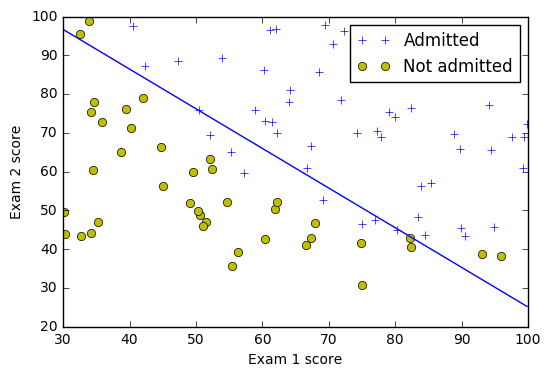

In [10]:
fig, ax = plt.subplots()

# Mask for selecting positive and negative samples
y_pos = y == 1
y_neg = y == 0

# Plot samples and decision boundary
ax.plot(X[y_pos,0], X[y_pos,1], 'b+', label='Admitted')
ax.plot(X[y_neg,0], X[y_neg,1], 'yo', label='Not admitted')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.legend(loc='upper right')

# Plot decision boundary
ax.plot(x1_plot, x2_plot)
plt.show()

In [11]:
X_test = np.array([
    [45., 85.],
    [50., 50.],
    [80., 80.]
])

In [12]:
# Predict class
clf.predict(X_test)

array([ 1.,  0.,  1.])

In [13]:
# Predict class probabilities
clf.predict_proba(X_test)

array([[  2.23709868e-01,   7.76290132e-01],
       [  9.91642300e-01,   8.35769979e-03],
       [  5.78239123e-04,   9.99421761e-01]])

In [14]:
theta0 = clf.intercept_[0]
theta1 = clf.coef_[0,0]
theta2 = clf.coef_[0,1]

In [15]:
theta0, theta1, theta2

(-25.161385671019776, 0.20623222395628088, 0.20147190519771871)

In [16]:
# Classification accuracy on training set
clf.score(X, y)

0.89000000000000001

### Regularized logistic regression

In [17]:
# Microchip test: 
# - test 1 (x1) 
# - test 2 (x2)
# - accepted=1, rejected=0 (y)
data = np.loadtxt('data/ml-ex2/ex2data2.txt', delimiter=',')

In [18]:
# LogisticRegression estimator expect an y row vector
X, y = np.hsplit(data, np.array([2]))

In [19]:
# Logistic regression estimator requires an y row vector
y = y.ravel()

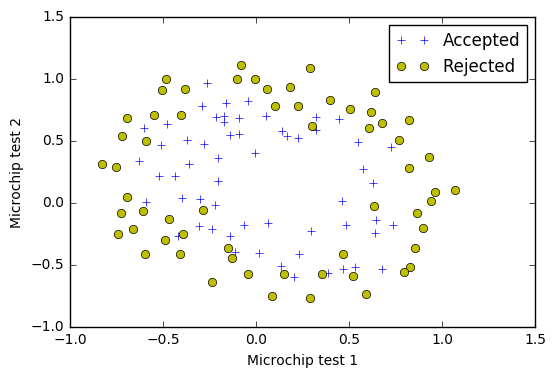

In [20]:
fig, ax = plt.subplots()

# Mask for selecting positive and negative samples
y_pos = y == 1
y_neg = y == 0

# Plot samples
ax.plot(X[y_pos,0], X[y_pos,1], 'b+', label='Accepted')
ax.plot(X[y_neg,0], X[y_neg,1], 'yo', label='Rejected')
ax.set_xlabel('Microchip test 1')
ax.set_ylabel('Microchip test 2')
ax.legend(loc='upper right')
plt.show()

In [21]:
# Preprocessor to include polynomial features up to degree 6
poly = PolynomialFeatures(6, include_bias=False)

# Mean and standard deviation scaler
scaler = StandardScaler()

# Logistic regression classifier. 
# - C=1.0 will result in good fit
# - C=1e4 will result in overfit (to little regularization)
# - C=1e-2 will result in underfit (to much regularization)
clf = LogisticRegression(C=1.0, solver='lbfgs')

# Pipeline of polynomial feature generator, feature scaler and linear regressor
model = Pipeline([('poly', poly), ('scaler', scaler), ('clf', clf)])

# Fit data to model
model.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=6, include_bias=False, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False))])

In [22]:
# Classification accuracy on training set
model.score(X, y)

0.83050847457627119

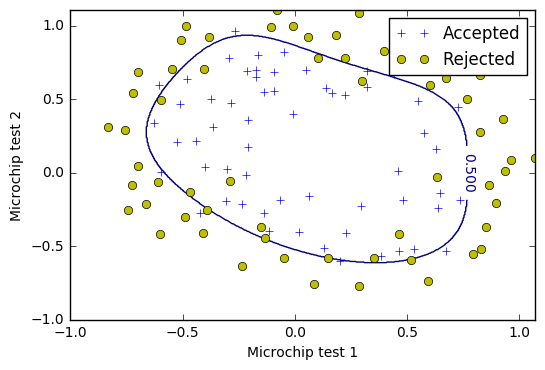

In [23]:
grid = np.mgrid[-1:1:500j, -1:1:500j]

# Compute acceptance probabilities on 500*500 grid 
X_grid = np.c_[grid[0].ravel(), grid[1].ravel()]
y_grid = model.predict(X_grid).reshape(grid[0].shape)

# Plot decision boundary on previous figure
cs = ax.contour(grid[0], grid[1], y_grid, 'g-', levels=[0.5])
ax.clabel(cs)

# Show previous figure with decision boundary
fig